<a href="https://colab.research.google.com/github/dallinmoore/DATA_5610_Deep_Learning/blob/main/Homework/project_3/project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solar Energy Production
**Author**: Dallin Moore  
**Project**: Project 3 - DATA 5610

## Import Dataset

In [18]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("anikannal/solar-power-generation-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/solar-power-generation-data


In [19]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/anikannal/solar-power-generation-data/versions/1"
print(os.listdir(dataset_path))  # Check the files available


['Plant_1_Generation_Data.csv', 'Plant_1_Weather_Sensor_Data.csv', 'Plant_2_Generation_Data.csv', 'Plant_2_Weather_Sensor_Data.csv']


In [20]:
import pandas as pd

p1_weather = pd.read_csv(os.path.join(dataset_path, "Plant_1_Weather_Sensor_Data.csv"))
p1_weather.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [21]:
p2_weather = pd.read_csv(os.path.join(dataset_path, "Plant_2_Weather_Sensor_Data.csv"))
p2_weather.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0


In [22]:
p1_gen = pd.read_csv(os.path.join(dataset_path, "Plant_1_Generation_Data.csv"))
p1_gen.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [23]:
p2_gen = pd.read_csv(os.path.join(dataset_path, "Plant_2_Generation_Data.csv"))
p2_gen.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07


## Data Preprocessing and EDA

In [24]:
# make all of the DATE_TIME columns date format
p1_weather['DATE_TIME'] = pd.to_datetime(p1_weather['DATE_TIME'])
p2_weather['DATE_TIME'] = pd.to_datetime(p2_weather['DATE_TIME'])
p1_gen['DATE_TIME'] = pd.to_datetime(p1_gen['DATE_TIME'], dayfirst=True)
p2_gen['DATE_TIME'] = pd.to_datetime(p2_gen['DATE_TIME'])

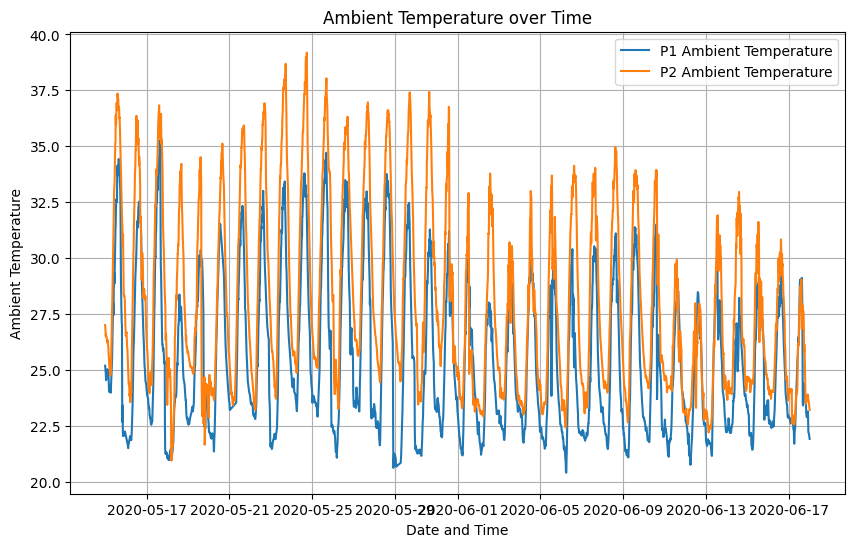

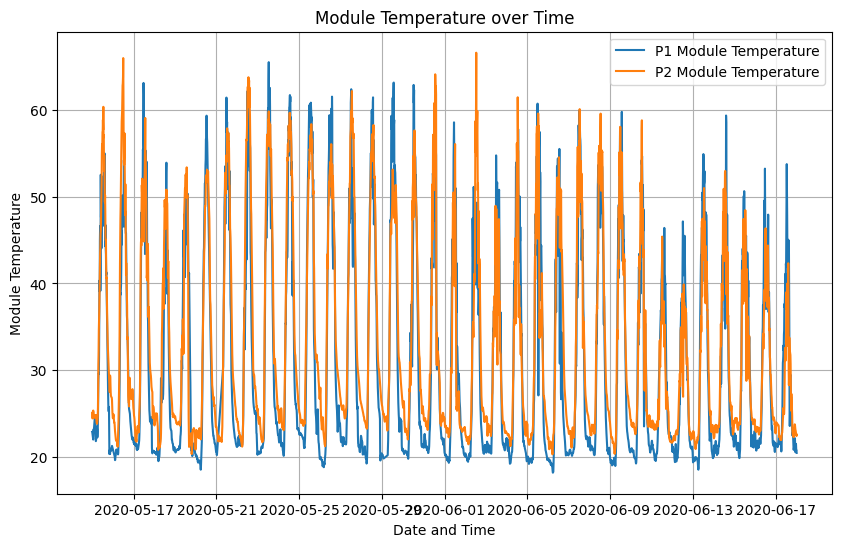

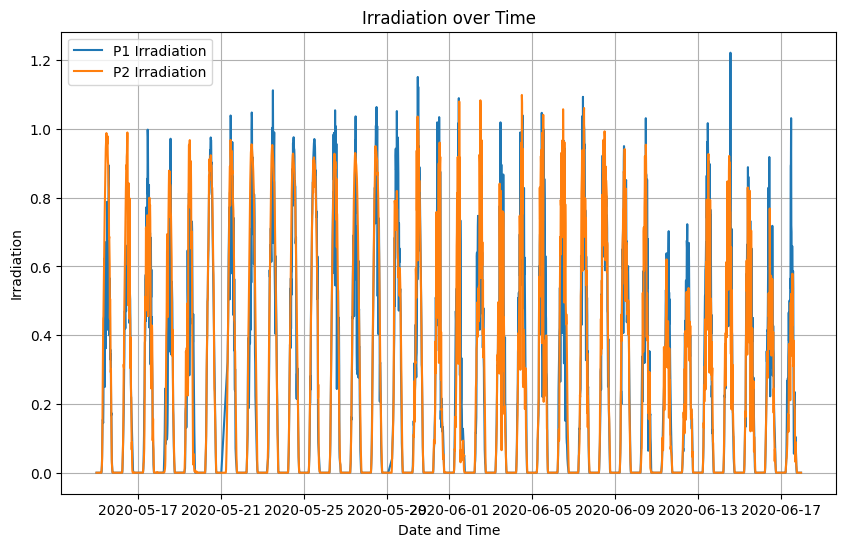

In [25]:
import matplotlib.pyplot as plt

# Plot AMBIENT_TEMPERATURE
plt.figure(figsize=(10, 6))
plt.plot(p1_weather['DATE_TIME'], p1_weather['AMBIENT_TEMPERATURE'], label='P1 Ambient Temperature')
plt.plot(p2_weather['DATE_TIME'], p2_weather['AMBIENT_TEMPERATURE'], label='P2 Ambient Temperature')
plt.xlabel('Date and Time')
plt.ylabel('Ambient Temperature')
plt.title('Ambient Temperature over Time')
plt.legend()
plt.grid(True)
plt.show()


# Plot MODULE_TEMPERATURE
plt.figure(figsize=(10, 6))
plt.plot(p1_weather['DATE_TIME'], p1_weather['MODULE_TEMPERATURE'], label='P1 Module Temperature')
plt.plot(p2_weather['DATE_TIME'], p2_weather['MODULE_TEMPERATURE'], label='P2 Module Temperature')
plt.xlabel('Date and Time')
plt.ylabel('Module Temperature')
plt.title('Module Temperature over Time')
plt.legend()
plt.grid(True)
plt.show()

# Plot IRRADIATION
plt.figure(figsize=(10, 6))
plt.plot(p1_weather['DATE_TIME'], p1_weather['IRRADIATION'], label='P1 Irradiation')
plt.plot(p2_weather['DATE_TIME'], p2_weather['IRRADIATION'], label='P2 Irradiation')
plt.xlabel('Date and Time')
plt.ylabel('Irradiation')
plt.title('Irradiation over Time')
plt.legend()
plt.grid(True)
plt.show()


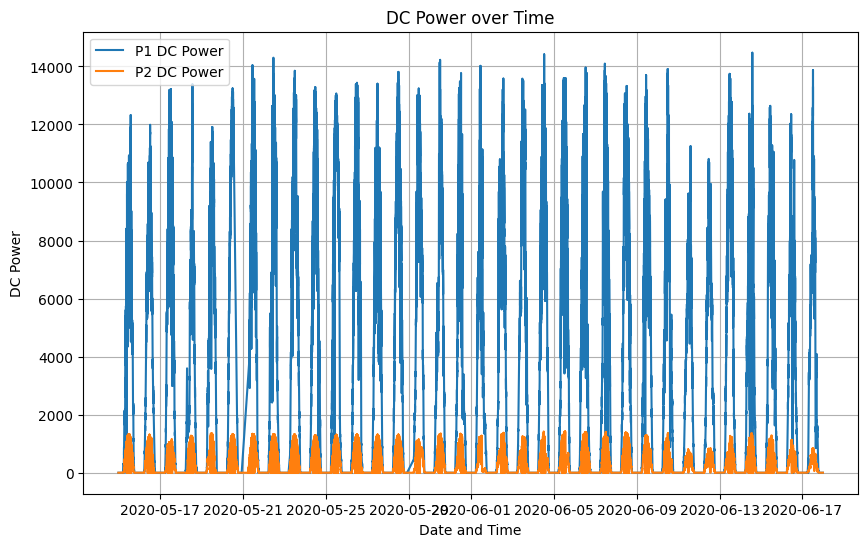

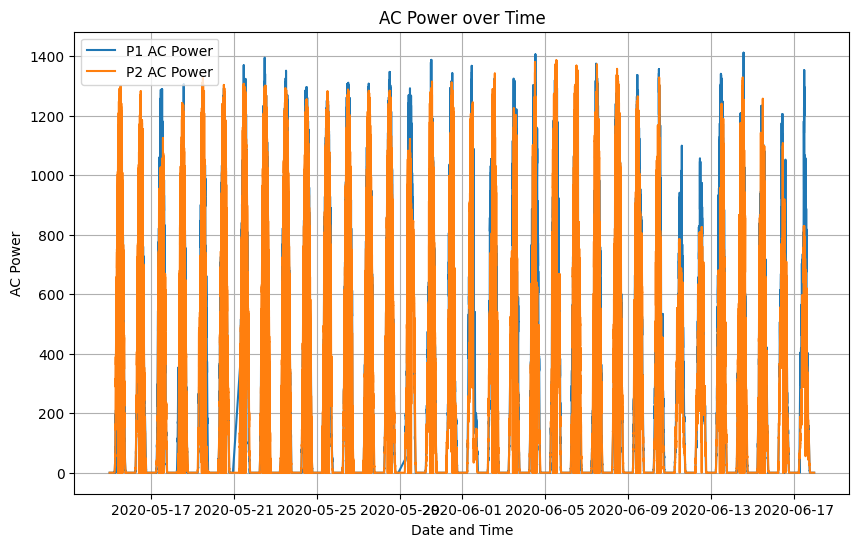

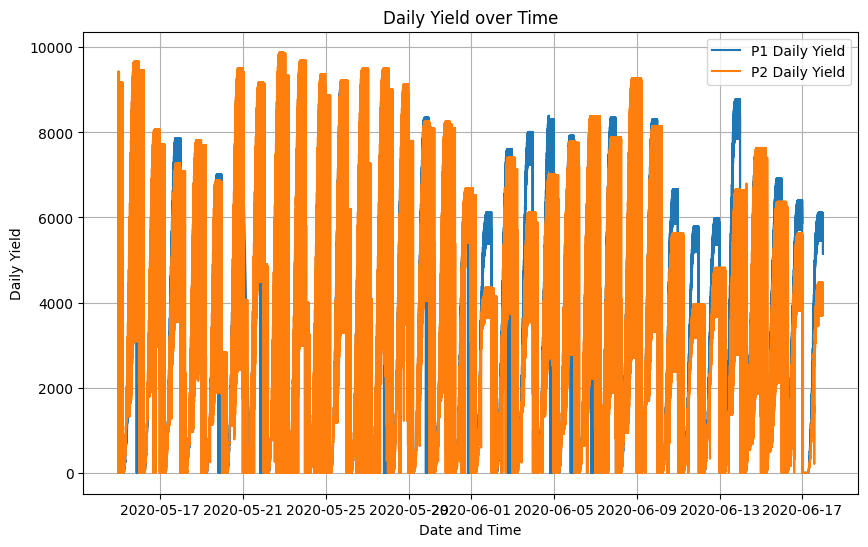

In [26]:
import matplotlib.pyplot as plt

# Plot DC_POWER
plt.figure(figsize=(10, 6))
plt.plot(p1_gen['DATE_TIME'], p1_gen['DC_POWER'], label='P1 DC Power')
plt.plot(p2_gen['DATE_TIME'], p2_gen['DC_POWER'], label='P2 DC Power')
plt.xlabel('Date and Time')
plt.ylabel('DC Power')
plt.title('DC Power over Time')
plt.legend()
plt.grid(True)
plt.show()


# Plot AC_POWER
plt.figure(figsize=(10, 6))
plt.plot(p1_gen['DATE_TIME'], p1_gen['AC_POWER'], label='P1 AC Power')
plt.plot(p2_gen['DATE_TIME'], p2_gen['AC_POWER'], label='P2 AC Power')
plt.xlabel('Date and Time')
plt.ylabel('AC Power')
plt.title('AC Power over Time')
plt.legend()
plt.grid(True)
plt.show()

# Plot DAILY_YIELD
plt.figure(figsize=(10, 6))
plt.plot(p1_gen['DATE_TIME'], p1_gen['DAILY_YIELD'], label='P1 Daily Yield')
plt.plot(p2_gen['DATE_TIME'], p2_gen['DAILY_YIELD'], label='P2 Daily Yield')
plt.xlabel('Date and Time')
plt.ylabel('Daily Yield')
plt.title('Daily Yield over Time')
plt.legend()
plt.grid(True)
plt.show()


In [27]:
# map the weather and generation data together on DATE_TIME
full_p1 = pd.merge(p1_gen, p1_weather, on='DATE_TIME')
full_p2 = pd.merge(p2_gen, p2_weather, on='DATE_TIME')
data = pd.concat([full_p1, full_p2])
data.head()

,DATE_TIME,PLANT_ID_x,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,PLANT_ID_y,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0


In [28]:
data

,DATE_TIME,PLANT_ID_x,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,PLANT_ID_y,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
2,2020-05-15 00:00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
3,2020-05-15 00:00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
4,2020-05-15 00:00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,4136001,q49J1IKaHRwDQnt,0.0,0.0,4157.0,520758.0,4136001,iq8k7ZNt4Mwm3w0,23.202871,22.535908,0.0
67694,2020-06-17 23:45:00,4136001,rrq4fwE8jgrTyWY,0.0,0.0,3931.0,121131356.0,4136001,iq8k7ZNt4Mwm3w0,23.202871,22.535908,0.0
67695,2020-06-17 23:45:00,4136001,vOuJvMaM2sgwLmb,0.0,0.0,4322.0,2427691.0,4136001,iq8k7ZNt4Mwm3w0,23.202871,22.535908,0.0
67696,2020-06-17 23:45:00,4136001,xMbIugepa2P7lBB,0.0,0.0,4218.0,106896394.0,4136001,iq8k7ZNt4Mwm3w0,23.202871,22.535908,0.0


In [29]:
# scale the data for each inverter per the SOURCE KEY
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler

features = ['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']
target = 'AC_POWER'

feature_scalers = {}
target_scalers = {}

for key in data['SOURCE_KEY_x'].unique():
    group_data = data[data['SOURCE_KEY_x'] == key].copy()

    # Scale features
    feature_scaler = MinMaxScaler()
    group_data[features] = feature_scaler.fit_transform(group_data[features])
    feature_scalers[key] = feature_scaler

    # Scale target
    target_scaler = MinMaxScaler()
    group_data[target] = target_scaler.fit_transform(group_data[[target]])
    target_scalers[key] = target_scaler

    # Assign back
    data.loc[group_data.index, features] = group_data[features]
    data.loc[group_data.index, target] = group_data[target]

full_p1.head()

,DATE_TIME,PLANT_ID_x,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,PLANT_ID_y,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0


In [51]:
# Sequence the data and split into train/val/test
import numpy as np

sequence_length = 48 # 1 day (24 hours, 4 every hour/every 15 mins)
train_ratio = 0.7
val_ratio = 0.15

X_train, y_train, X_val, y_val, X_test, y_test = [], [], [], [], [], []

for key in full_p1['SOURCE_KEY_x'].unique():
    group_df = full_p1[full_p1['SOURCE_KEY_x'] == key].reset_index(drop=True)
    group_features = group_df[features].to_numpy()
    group_target = group_df[target].to_numpy()

    n_total = len(group_df)
    n_train = int(n_total * train_ratio)
    n_val = int(n_total * val_ratio)

    # Generate sequences
    for i in range(sequence_length, n_total):
        seq = group_features[i-sequence_length:i]
        target_val = group_target[i]

        if i < n_train:
            X_train.append(seq)
            y_train.append(target_val)
        elif i < n_train + n_val:
            X_val.append(seq)
            y_val.append(target_val)
        else:
            X_test.append(seq)
            y_test.append(target_val)

X_train, y_train = np.array(X_train), np.array(y_train)
X_val, y_val = np.array(X_val), np.array(y_val)
X_test, y_test = np.array(X_test), np.array(y_test)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (47075, 48, 3)
y_train shape: (47075,)
X_val shape: (10302, 48, 3)
y_val shape: (10302,)
X_test shape: (10341, 48, 3)
y_test shape: (10341,)


## Modelling

In [45]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

input_shape = (X_train.shape[1], X_train.shape[2])  # (sequence_length, num_features)

model = Sequential()
model.add(LSTM(64, input_shape=input_shape, return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(1))  # output layer for regression (predicting a single value)

model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['mae'])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                        │ (None, 48, 64)              │          17,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 48, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,857 (116.63 KB)

 Trainable params: 29,857 (116.63 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32
)


Epoch 1/30
1472/1472 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 252966.5156 - mae: 315.0790 - val_loss: 192866.0625 - val_mae: 267.8501
Epoch 2/30
1472/1472 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - loss: 225682.3594 - mae: 289.3672 - val_loss: 169068.0312 - val_mae: 243.4768
Epoch 3/30
1472/1472 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 198585.1250 - mae: 265.0862 - val_loss: 147530.0938 - val_mae: 223.8184
Epoch 4/30
1472/1472 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - loss: 176358.1875 - mae: 245.2565 - val_loss: 127897.2188 - val_mae: 204.5387
Epoch 5/30
1472/1472 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - loss: 152797.2500 - mae: 222.9374 - val_loss: 110110.8984 - val_mae: 185.6887
Epoch 6/30
1472/1472 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - loss: 134257.0625 - mae: 206.1608 - val_loss: 94226.2266 - val_mae: 168.4718
Epoch 7/30
1472/1472 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - loss: 115490.6562 - mae: 188.1507 - val_loss: 80132.7188 - val_mae: 153.9312
Epoch 8/30
1472/1472 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - 

In [47]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test loss: {test_loss},Test MAE: {test_mae}")

324/324 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 15704.0381 - mae: 58.4319
Test loss: 12768.2705078125,Test MAE: 55.837127685546875


In [48]:
from sklearn.metrics import mean_absolute_error
import numpy as np

# Shift y_test by one timestep to use the previous value as the prediction
y_naive_pred = np.roll(y_test, shift=1)  # Shift by 1 timestep
y_naive_pred[0] = y_test[0]  # First value has no previous timestep, so keep it the same

# Compute MAE
naive_mae = mean_absolute_error(y_test, y_naive_pred)

print(f"Naive Baseline MAE: {naive_mae:.2f}")

Naive Baseline MAE: 58.69


## Plot The Results

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


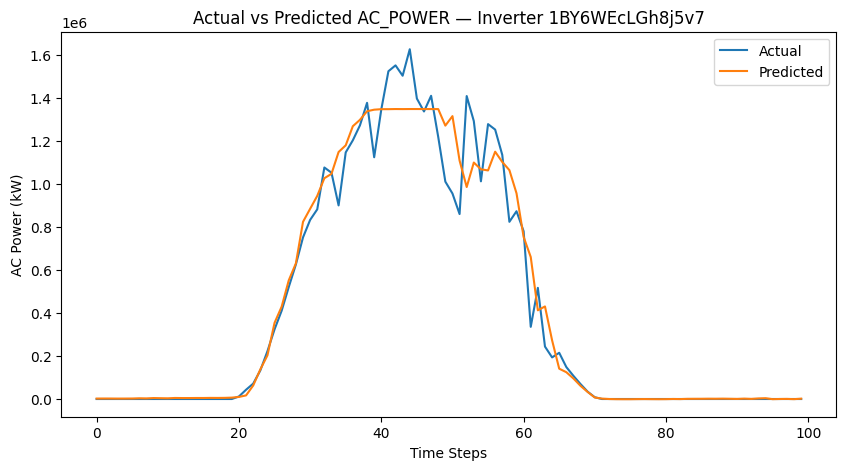

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


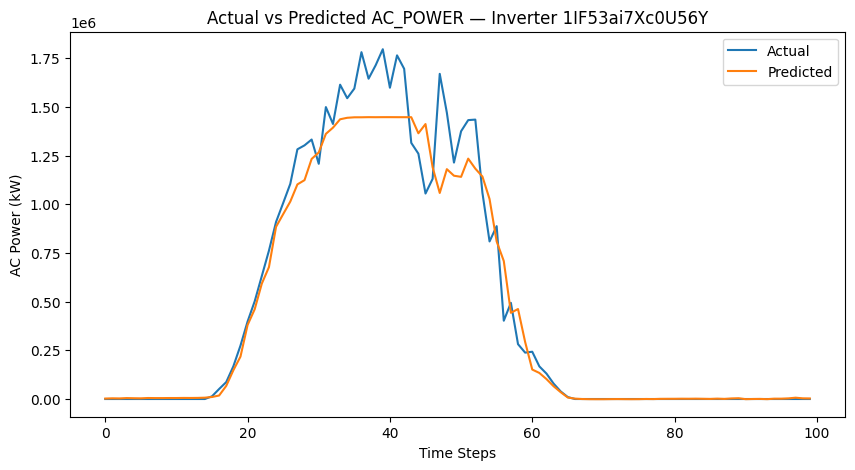

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


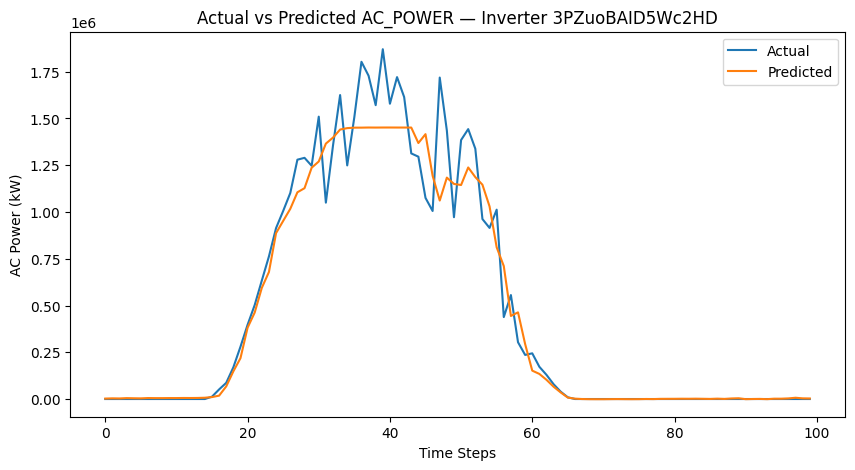

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


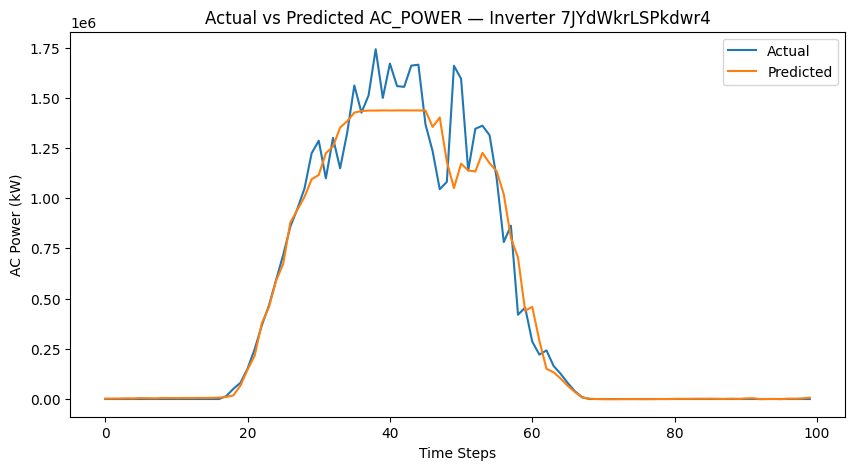

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


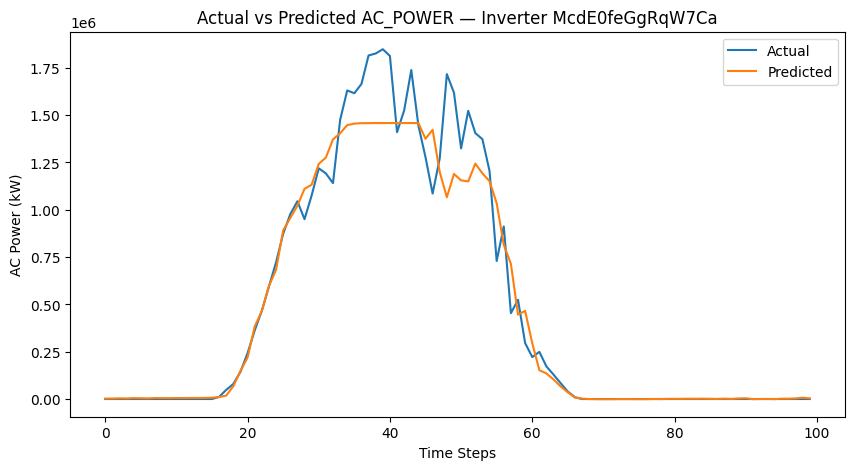

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


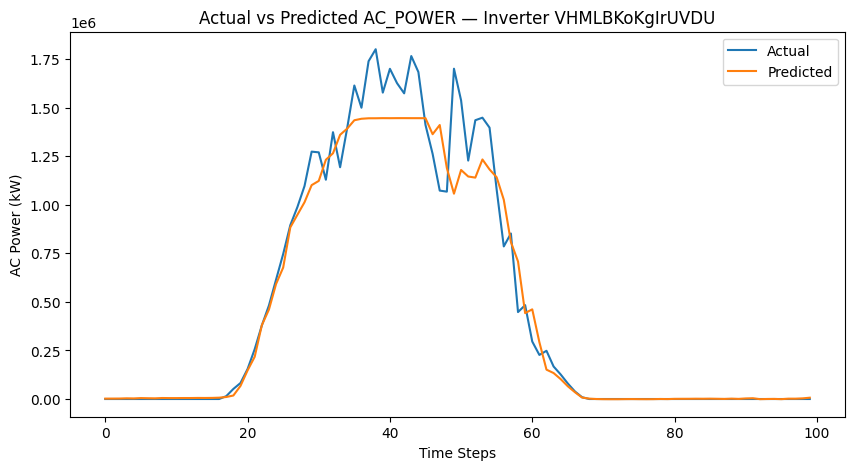

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


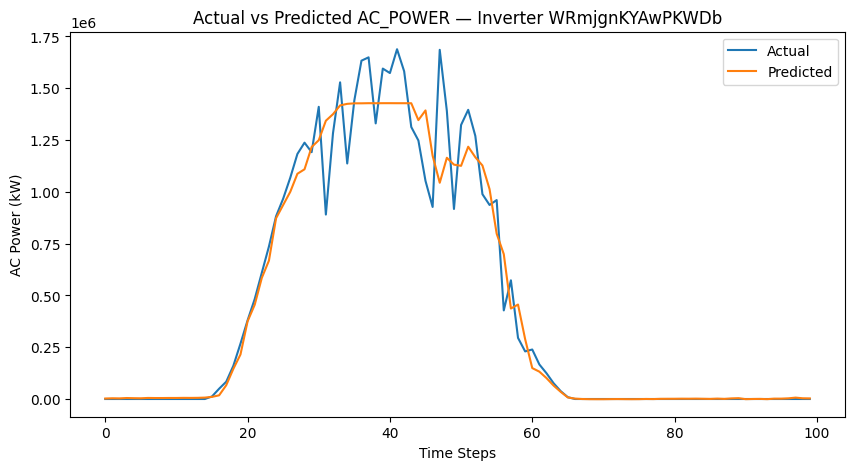

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


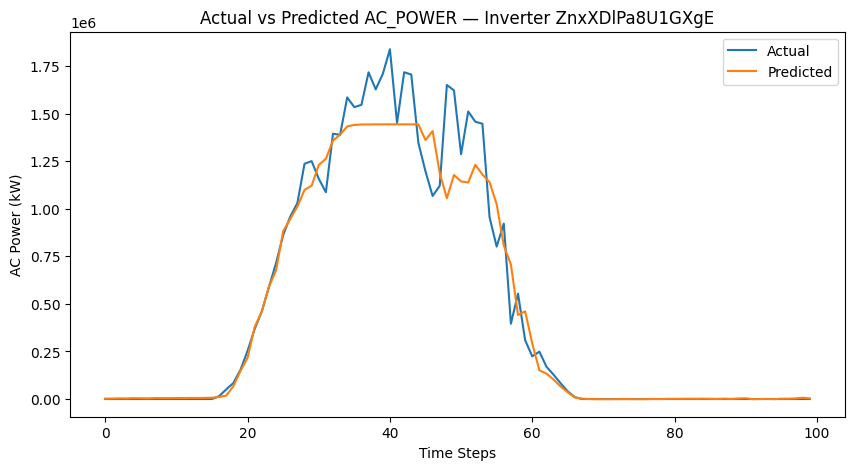

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


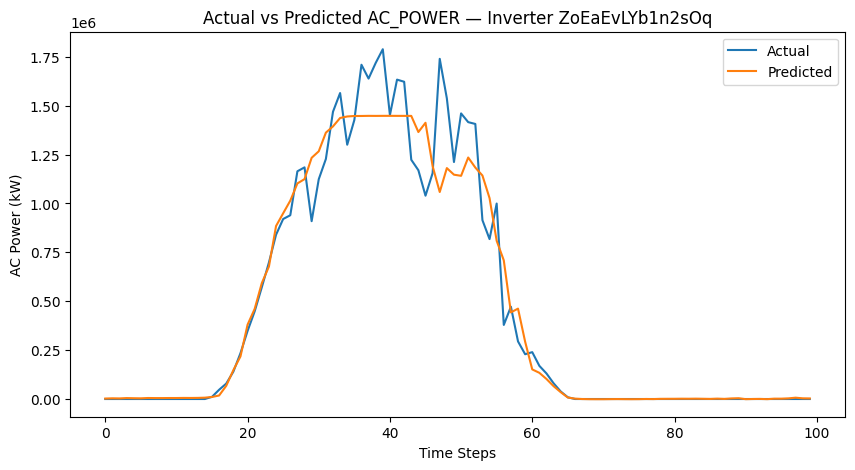

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


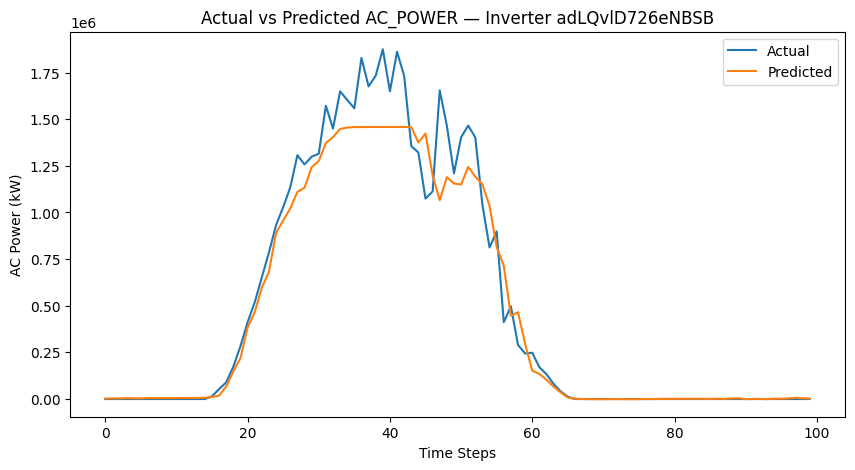

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


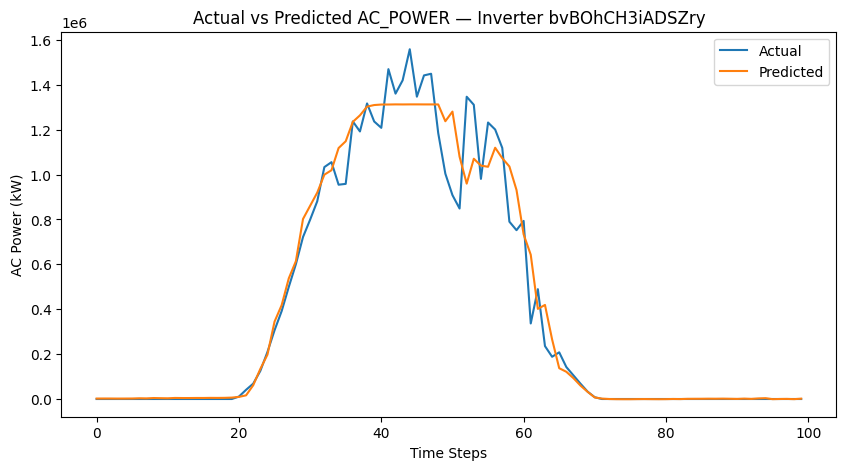

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


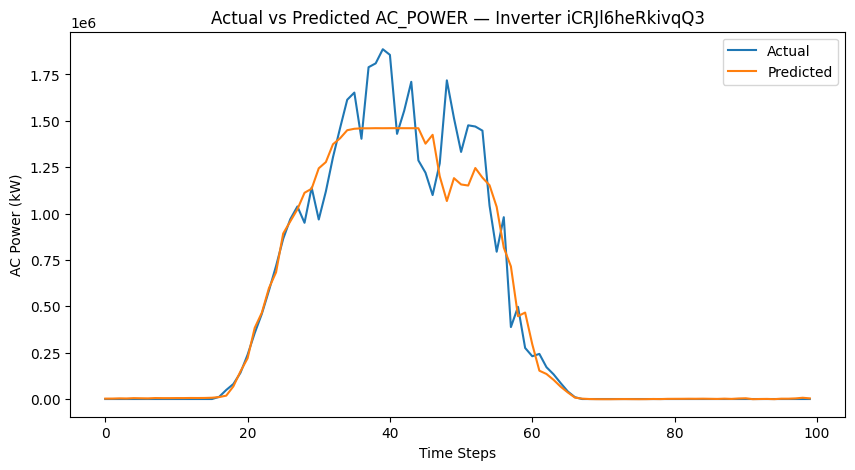

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


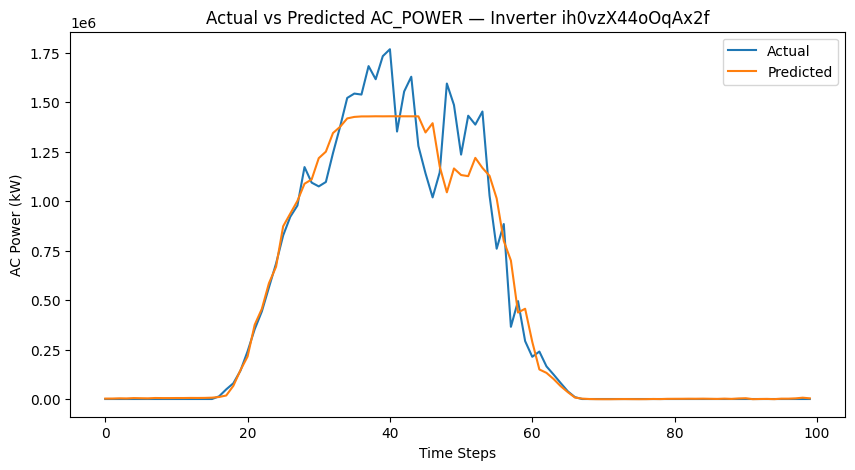

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


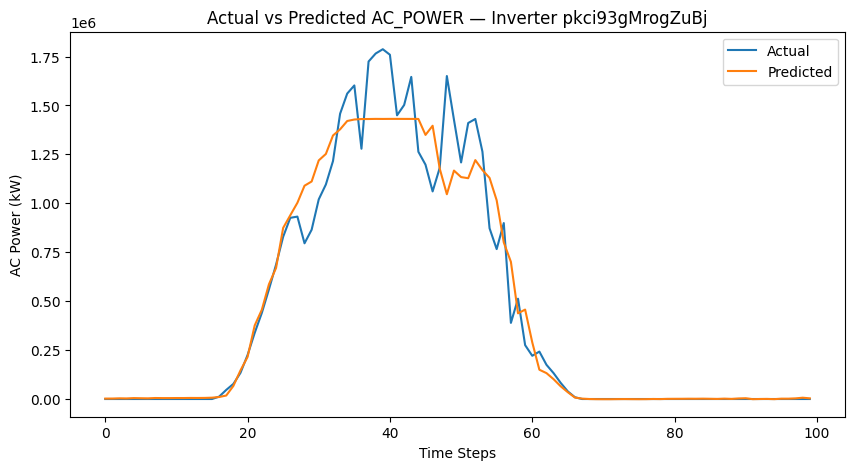

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


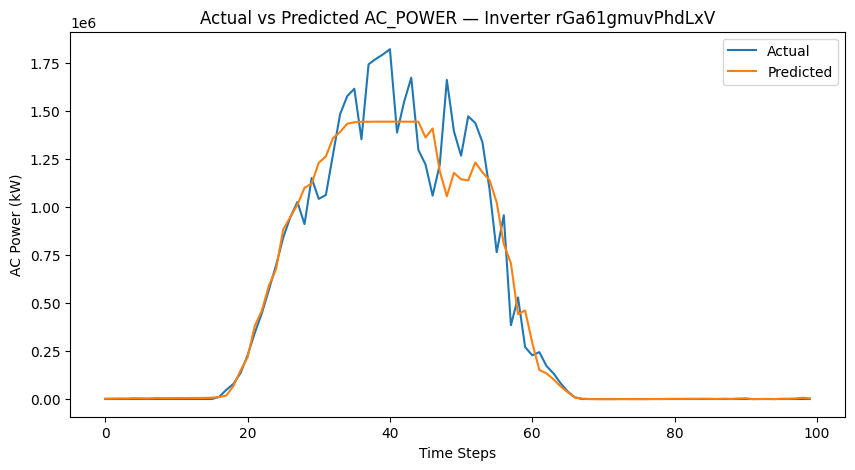

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


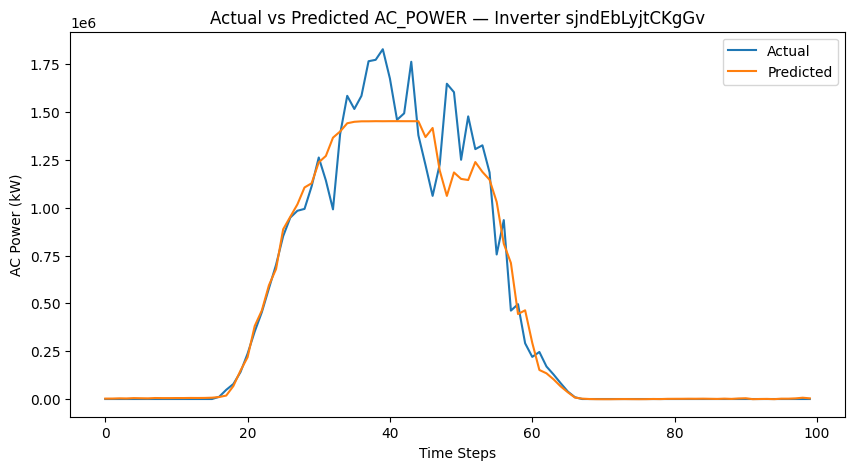

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


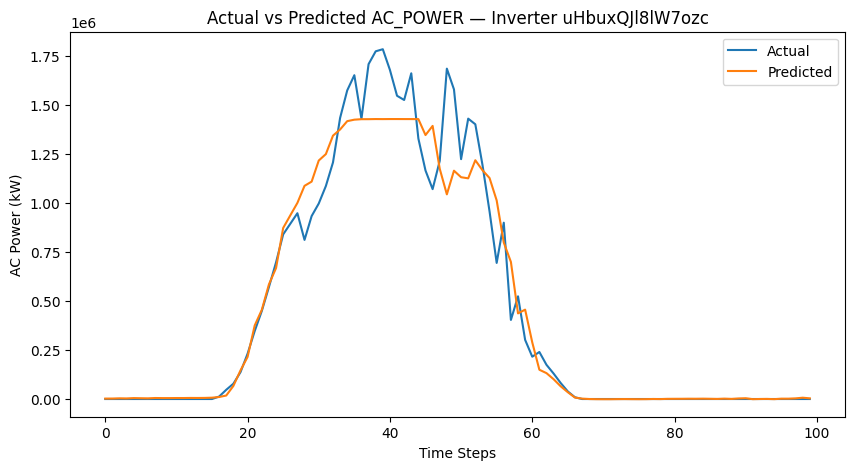

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


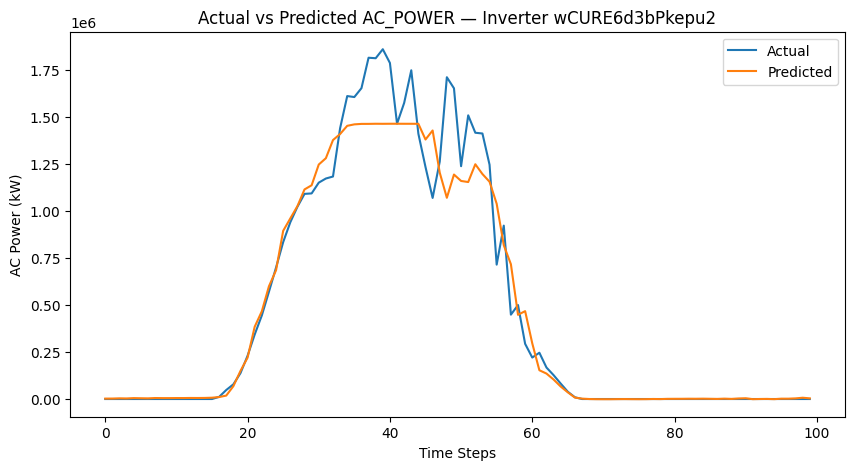

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


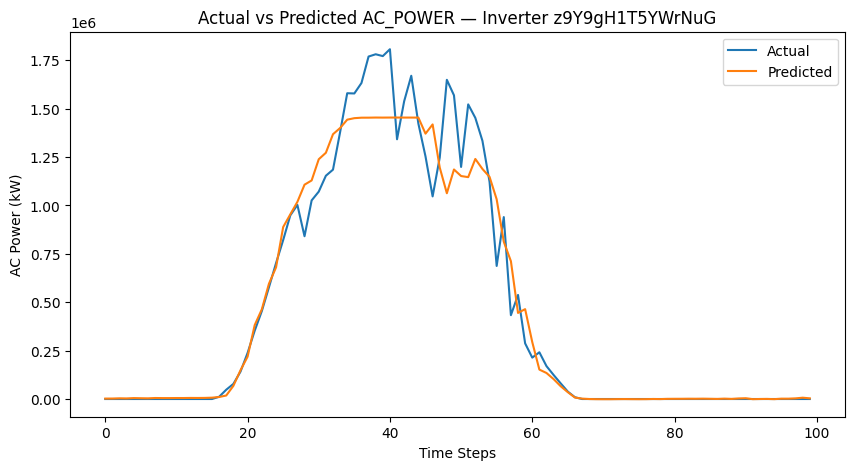

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


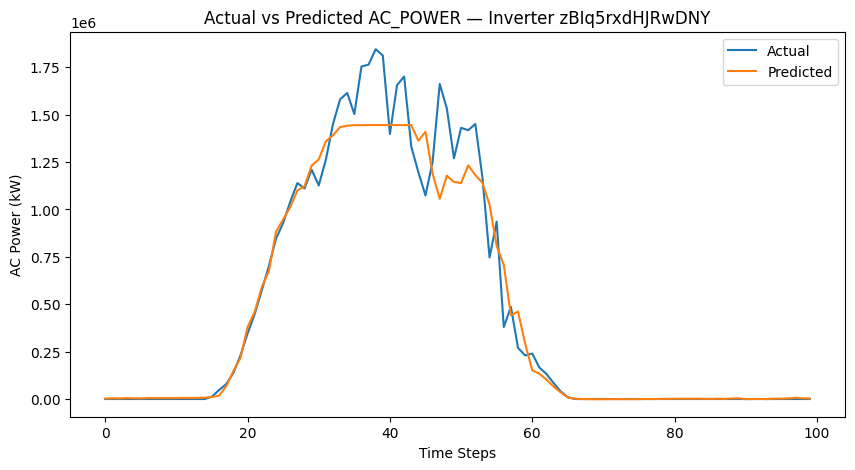

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


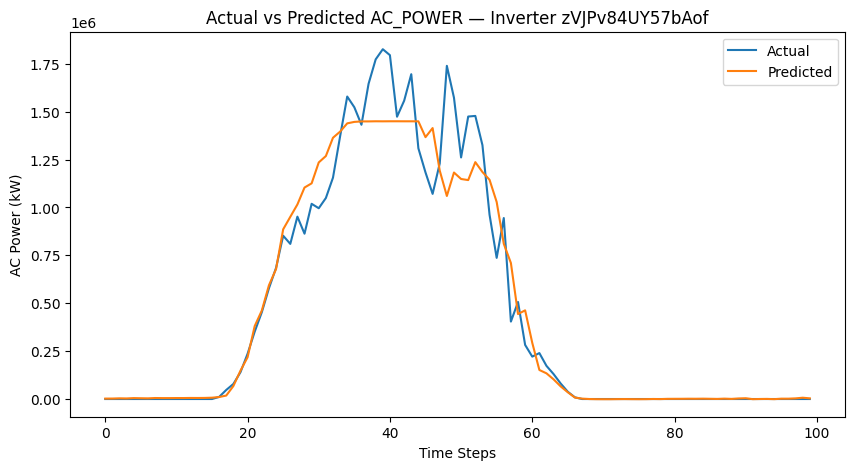

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


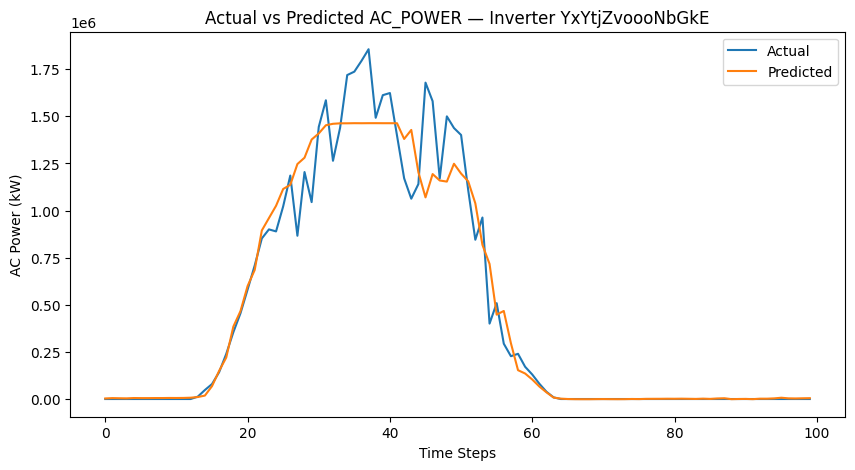

IndexError: index 10341 is out of bounds for axis 0 with size 10341

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Recreate the test_keys list to match the order of y_test
test_keys = []

for key in data['SOURCE_KEY_x'].unique():
    group_df = data[data['SOURCE_KEY_x'] == key].reset_index(drop=True)
    group_features = group_df[features].to_numpy()
    group_target = group_df[target].to_numpy()

    n_total = len(group_df)
    n_train = int(n_total * train_ratio)
    n_val = int(n_total * val_ratio)

    for i in range(sequence_length, n_total):
        if i >= n_train + n_val:
            test_keys.append(key)

# Convert to np.array for easy filtering
test_keys = np.array(test_keys)
y_test = np.array(y_test)

# Choose a key to visualize
# key = '1BY6WEcLGh8j5v7'

for key in data['SOURCE_KEY_x'].unique():
    # Find the indices where test_keys match the chosen inverter
    key_indices = np.where(test_keys == key)[0]

    # Filter predictions and true labels
    X_test_key = X_test[key_indices]
    y_test_key = y_test[key_indices]

    # Predict
    y_pred = model.predict(X_test_key)

    # Inverse transform predictions and actuals using the target scaler
    scaler = target_scalers[key]
    y_pred_rescaled = scaler.inverse_transform(y_pred)
    y_test_rescaled = scaler.inverse_transform(y_test_key.reshape(-1, 1))

    # Plot actual vs predicted
    plt.figure(figsize=(10, 5))
    plt.plot(y_test_rescaled[:100], label="Actual")
    plt.plot(y_pred_rescaled[:100], label="Predicted")
    plt.legend()
    plt.title(f"Actual vs Predicted AC_POWER — Inverter {key}")
    plt.xlabel("Time Steps")
    plt.ylabel("AC Power (kW)")
    plt.show()
